In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path as path

JSON_PATH = path.join('/app','data', 'techs.json')
print(JSON_PATH)

print('Reading data')
df = pd.read_json(JSON_PATH)
print('Done')


/app/data/techs.json
Reading data
Done


In [2]:
df.head()

,month,year,repoLanguage,countStar
0,11,2019,"""JavaScript""",331789
1,10,2019,"""JavaScript""",329381
2,7,2019,"""JavaScript""",313831
3,12,2019,"""JavaScript""",294597
4,8,2019,"""JavaScript""",275540


In [3]:
with_counts = df.groupby(["repoLanguage", "month", "year"]).sum('countStar').reset_index()
with_counts

,repoLanguage,month,year,countStar
0,"""1C Enterprise""",1,2017,23
1,"""1C Enterprise""",1,2019,2
2,"""1C Enterprise""",1,2020,15
3,"""1C Enterprise""",2,2017,36
4,"""1C Enterprise""",2,2018,34
...,...,...,...,...
14329,null,12,2015,27625
14330,null,12,2016,50930
14331,null,12,2017,61034
14332,null,12,2018,61835


In [4]:
grouped = with_counts.groupby(["month", "year"]).apply(lambda x: x.sort_values(['countStar'], ascending = False)).reset_index(drop=True)
grouped
final_data = grouped.groupby(["month", "year"]).head(10)
final_data

,repoLanguage,month,year,countStar
0,"""JavaScript""",1,2015,44454
1,"""Python""",1,2015,26413
2,"""Ruby""",1,2015,26309
3,"""Java""",1,2015,22185
4,null,1,2015,22110
...,...,...,...,...
14064,"""Ruby""",12,2019,81951
14065,"""HTML""",12,2019,81906
14066,"""Go""",12,2019,65612
14067,"""C++""",12,2019,57895


In [5]:
plot_data = pd.pivot_table(final_data, index=['year', 'month'], columns=['repoLanguage'])

plot_data

countStar                                                         \
repoLanguage       "C"    "C#"    "C++"    "CSS"     "Go"    "HTML"    "Java"   
year month                                                                      
2015 1          7170.0  6117.0  11955.0  14088.0      NaN       NaN   22185.0   
     2          6911.0  7074.0  12137.0  13637.0      NaN       NaN   22987.0   
     3             NaN  8690.0  14240.0  11549.0      NaN   17617.0   27735.0   
     4             NaN  8627.0  13886.0  10471.0      NaN   18439.0   27842.0   
     5             NaN  8654.0  14028.0  10986.0      NaN   19135.0   28665.0   
...                ...     ...      ...      ...      ...       ...       ...   
2019 9             NaN     NaN  47337.0      NaN  55087.0   83066.0   86294.0   
     10            NaN     NaN  72423.0      NaN  73448.0  106489.0  119203.0   
     11            NaN     NaN  60216.0      NaN  69104.0   94718.0  117498.0   
     12            NaN     NaN  57895.0      NaN  65612.0   81906.0  101826.0   
2020 1             NaN     NaN  27312.0      NaN  30850.0   36495.0   43204.0   

                                                                              
repoLanguage "JavaScript"    "PHP"  "Python"   "Ruby" "TypeScript"      null  
year month                                                                    
2015 1            44454.0  18002.0   26413.0  26309.0          NaN   22110.0  
     2            46062.0  17932.0   27223.0  26839.0          NaN   21174.0  
     3            51931.0  21170.0   31758.0  31043.0          NaN   23999.0  
     4            52198.0  19984.0   32466.0  29017.0          NaN   22478.0  
     5            51669.0  19881.0   30667.0  27680.0          NaN   22159.0  
...                   ...      ...       ...      ...          ...       ...  
2019 9           260446.0  38508.0  114921.0  57818.0      94752.0   99473.0  
     10          329381.0  49885.0  161854.0  66578.0     122962.0  145306.0  
     11          331789.0  48867.0  148194.0  85596.0     126328.0  107177.0  
     12          294597.0  49536.0  132816.0  81951.0     118040.0   95037.0  
2020 1           140992.0  21335.0   62977.0  29826.0      59405.0   44502.0  

[61 rows x 13 columns]

Text(0, 0.5, 'Cantidad')

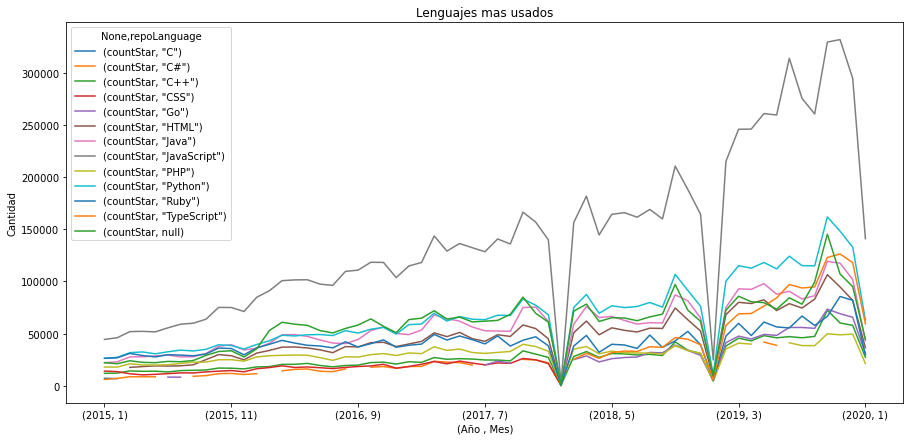

In [18]:
plot=plot_data.plot(figsize=(15,7),title='Lenguajes mas usados')
plot.set_xlabel("(Año , Mes)")
plot.set_ylabel("Cantidad")